## Explore Movie Critic Score VS. Audience Score

In [1]:
import pandas as pd
import zipfile
import os
import requests
import glob
from bs4 import BeautifulSoup

In [2]:
import sys
!{sys.executable} -m pip install -U wptools

Requirement already up-to-date: wptools in /Users/xiyuewang/opt/anaconda3/lib/python3.7/site-packages (0.4.17)


In [3]:
import wptools
from PIL import Image, ImageDraw, ImageFilter
from io import BytesIO

In [4]:
## Read critics review
df_critics = pd.read_csv('bestofrt.tsv', sep = '\t')
df_critics.head()

,ranking,critic_score,title,number_of_critic_ratings,audience_score,number_of_audience_ratings
0,53,100,12 Angry Men (Twelve Angry Men) (1957),49,97,103672
1,29,96,12 Years a Slave (2013),316,90,138789
2,22,98,A Hard Day's Night (1964),104,89,50067
3,60,98,A Streetcar Named Desire (1951),54,90,54761
4,48,97,Alien (1979),104,94,457186


In [5]:
## Read audience review
with zipfile.ZipFile('rt-html.zip', 'r') as myzip:
    myzip.extractall()

In [6]:
## Use beutiful soup to scrip the audience info
df_aud = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = BeautifulSoup(file, 'lxml')
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        audience_score = soup.find('div', class_="audience-score meter").find('span').contents[0][:-1]
        num_audience_ratings = soup.find('div', class_='audience-info hidden-xs superPageFontColor').\
        find_all('div')[1].contents[2].strip().replace(',', '')
        # Append to list of dictionaries
        df_aud.append({'title': title,
                        'audience_score': int(audience_score),
                        'number_of_audience_ratings': int(num_audience_ratings)})
df_aud = pd.DataFrame(df_aud, columns = ['title', 'audience_score', 'number_of_audience_ratings'])

In [7]:
df_aud.head()

,title,audience_score,number_of_audience_ratings
0,Zootopia (2016),92,98633
1,The Treasure of the Sierra Madre (1948),93,25627
2,All Quiet on the Western Front (1930),89,17768
3,Rear Window (1954),95,149458
4,Selma (2015),86,60533


In [3]:
### Add Roger Ebert review text
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [10]:
## Store text content
for url in ebert_review_urls:
    response = requests.get(url)
    with open(os.path.join(folder_name, 
                            url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [19]:
## Store info in a dataframe
df = []
for review in glob.glob('ebert_reviews/*.txt'):
    with open(review, encoding = 'utf-8') as file:
        title = file.readline()[:-1]
        review_url = file.readline()[:-1]
        review_text = file.read()
        df.append({'title': title,
                  'review_url': review_url,
                  'review_text': review_text})
df = pd.DataFrame(df, columns = ['title', 'review_url', 'review_text'])

In [20]:
df.head()

,title,review_url,review_text
0,Dunkirk (2017),http://www.rogerebert.com/reviews/dunkirk-2017,"Lean and ambitious, unsentimental and bombasti..."
1,Army of Shadows (L'Armée des ombres) (1969),http://www.rogerebert.com/reviews/great-movie-...,"Jean-Pierre Melville's ""Army of Shadows"" is ab..."
2,Alien (1979),http://www.rogerebert.com/reviews/great-movie-...,"At its most fundamental level, ""Alien"" is a mo..."
3,The Bride of Frankenstein (1935),http://www.rogerebert.com/reviews/great-movie-...,To a new world of gods and monsters.\n\nSo int...
4,The 400 Blows (Les Quatre cents coups) (1959),http://www.rogerebert.com/reviews/great-movie-...,I demand that a film express either the joy of...


In [30]:
## get images for each movie
folder_name = 'bestofrt_posters'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [28]:
title_list = [
 'The_Wizard_of_Oz_(1939_film)',
 'Citizen_Kane',
 'The_Third_Man',
 'Get_Out_(film)',
 'Mad_Max:_Fury_Road',
 'The_Cabinet_of_Dr._Caligari',
 'All_About_Eve',
 'Inside_Out_(2015_film)',
 'The_Godfather',
 'Metropolis_(1927_film)',
 'E.T._the_Extra-Terrestrial',
 'Modern_Times_(film)',
 'It_Happened_One_Night',
 "Singin'_in_the_Rain",
 'Boyhood_(film)',
 'Casablanca_(film)',
 'Moonlight_(2016_film)',
 'Psycho_(1960_film)',
 'Laura_(1944_film)',
 'Nosferatu',
 'Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 "A_Hard_Day%27s_Night_(film)",
 'La_Grande_Illusion',
 'North_by_Northwest',
 'The_Battle_of_Algiers',
 'Dunkirk_(2017_film)',
 'The_Maltese_Falcon_(1941_film)',
 'Repulsion_(film)',
 '12_Years_a_Slave_(film)',
 'Gravity_(2013_film)',
 'Sunset_Boulevard_(film)',
 'King_Kong_(1933_film)',
 'Spotlight_(film)',
 'The_Adventures_of_Robin_Hood',
 'Rashomon',
 'Rear_Window',
 'Selma_(film)',
 'Taxi_Driver',
 'Toy_Story_3',
 'Argo_(2012_film)',
 'Toy_Story_2',
 'The_Big_Sick',
 'Bride_of_Frankenstein',
 'Zootopia',
 'M_(1931_film)',
 'Wonder_Woman_(2017_film)',
 'The_Philadelphia_Story_(film)',
 'Alien_(film)',
 'Bicycle_Thieves',
 'Seven_Samurai',
 'The_Treasure_of_the_Sierra_Madre_(film)',
 'Up_(2009_film)',
 '12_Angry_Men_(1957_film)',
 'The_400_Blows',
 'Logan_(film)',
 'All_Quiet_on_the_Western_Front_(1930_film)',
 'Army_of_Shadows',
 'Arrival_(film)',
 'Baby_Driver',
 'A_Streetcar_Named_Desire_(1951_film)',
 'The_Night_of_the_Hunter_(film)',
 'Star_Wars:_The_Force_Awakens',
 'Manchester_by_the_Sea_(film)',
 'Dr._Strangelove',
 'Frankenstein_(1931_film)',
 'Vertigo_(film)',
 'The_Dark_Knight_(film)',
 'Touch_of_Evil',
 'The_Babadook',
 'The_Conformist_(film)',
 'Rebecca_(1940_film)',
 "Rosemary%27s_Baby_(film)",
 'Finding_Nemo',
 'Brooklyn_(film)',
 'The_Wrestler_(2008_film)',
 'The_39_Steps_(1935_film)',
 'L.A._Confidential_(film)',
 'Gone_with_the_Wind_(film)',
 'The_Good,_the_Bad_and_the_Ugly',
 'Skyfall',
 'Rome,_Open_City',
 'Tokyo_Story',
 'Hell_or_High_Water_(film)',
 'Pinocchio_(1940_film)',
 'The_Jungle_Book_(2016_film)',
 'La_La_Land_(film)',
 'Star_Trek_(film)',
 'High_Noon',
 'Apocalypse_Now',
 'On_the_Waterfront',
 'The_Wages_of_Fear',
 'The_Last_Picture_Show',
 'Harry_Potter_and_the_Deathly_Hallows_–_Part_2',
 'The_Grapes_of_Wrath_(film)',
 'Roman_Holiday',
 'Man_on_Wire',
 'Jaws_(film)',
 'Toy_Story',
 'The_Godfather_Part_II',
 'Battleship_Potemkin'
]

In [34]:
# List of dictionaries to build and convert to a DataFrame later
df_list = []
image_errors = {}
for title in title_list:
    try:
        # This cell is slow so print ranking to gauge time remaining
        ranking = title_list.index(title) + 1
        print(ranking)
        page = wptools.page(title, silent=True)
        # Your code here (three lines)
        images = page.get().data['image']
        # First image is usually the poster
        first_image_url = images[0]['url']
        r = requests.get(first_image_url)
        # Download movie poster image
        i = Image.open(BytesIO(r.content))
        image_file_format = first_image_url.split('.')[-1]
        i.save(folder_name + "/" + str(ranking) + "_" + title + '.' + image_file_format)
        # Append to list of dictionaries
        df_list.append({'ranking': int(ranking),
                        'title': title,
                        'poster_url': first_image_url})
    
    # Not best practice to catch all exceptions but fine for this short script
    except Exception as e:
        print(str(ranking) + "_" + title + ": " + str(e))
        image_errors[str(ranking) + "_" + title] = images

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


API error: {'code': 'invalidtitle', 'info': 'Bad title "A_Hard_Day%27s_Night_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}


22_A_Hard_Day%27s_Night_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=A_Hard_Day%2527s_Night_%28film%29
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
64_Dr._Strangelove: cannot identify image file <_io.BytesIO object at 0x1238aafb0>
65
66
67
68
69
70
71
72


API error: {'code': 'invalidtitle', 'info': 'Bad title "Rosemary%27s_Baby_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce&gt; for notice of API deprecations and breaking changes.'}


72_Rosemary%27s_Baby_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Rosemary%2527s_Baby_%28film%29
73
74
75
76
77
78
79
80
81
82
83
83_Hell_or_High_Water_(film): 'image'
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [35]:
for key in image_errors.keys():
    print(key)

22_A_Hard_Day%27s_Night_(film)
64_Dr._Strangelove
72_Rosemary%27s_Baby_(film)
83_Hell_or_High_Water_(film)


In [36]:
# Inspect unidentifiable images and download them individually
for rank_title, images in image_errors.items():
    if rank_title == '22_A_Hard_Day%27s_Night_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/4/47/A_Hard_Days_night_movieposter.jpg'
    if rank_title == '53_12_Angry_Men_(1957_film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/9/91/12_angry_men.jpg'
    if rank_title == '72_Rosemary%27s_Baby_(film)':
        url = 'https://upload.wikimedia.org/wikipedia/en/e/ef/Rosemarys_baby_poster.jpg'
    if rank_title == '93_Harry_Potter_and_the_Deathly_Hallows_–_Part_2':
        url = 'https://upload.wikimedia.org/wikipedia/en/d/df/Harry_Potter_and_the_Deathly_Hallows_%E2%80%93_Part_2.jpg'
    title = rank_title[3:]
    df_list.append({'ranking': int(title_list.index(title) + 1),
                    'title': title,
                    'poster_url': url})
    r = requests.get(url)
    # Download movie poster image
    i = Image.open(BytesIO(r.content))
    image_file_format = url.split('.')[-1]
    i.save(folder_name + "/" + rank_title + '.' + image_file_format)

In [ ]:
## Example of WordCloud

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
im = Image.open('bestofrt_posters/7_All_About_Eve.jpg')
mask = Image.new('L', im.size, 0)
draw = ImageDraw.Draw(mask)
draw.rectangle([(im.size[0]/4, im.size[1]/4), (im.size[0]*3/4, im.size[1]*3/4)], fill=255)
im2 = im.resize([450, 725])

In [58]:
img_w, img_h = im2.size
background = Image.new('RGBA', (900, 1440), (0, 0, 0, 0))
bg_w, bg_h = background.size
offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
background.paste(im2, offset)

In [65]:
mask = Image.new('L', background.size, 0)
draw = ImageDraw.Draw(mask)
draw.rectangle((225, (1440-725)//2, 675, (1440-725)//2+725), fill=255)

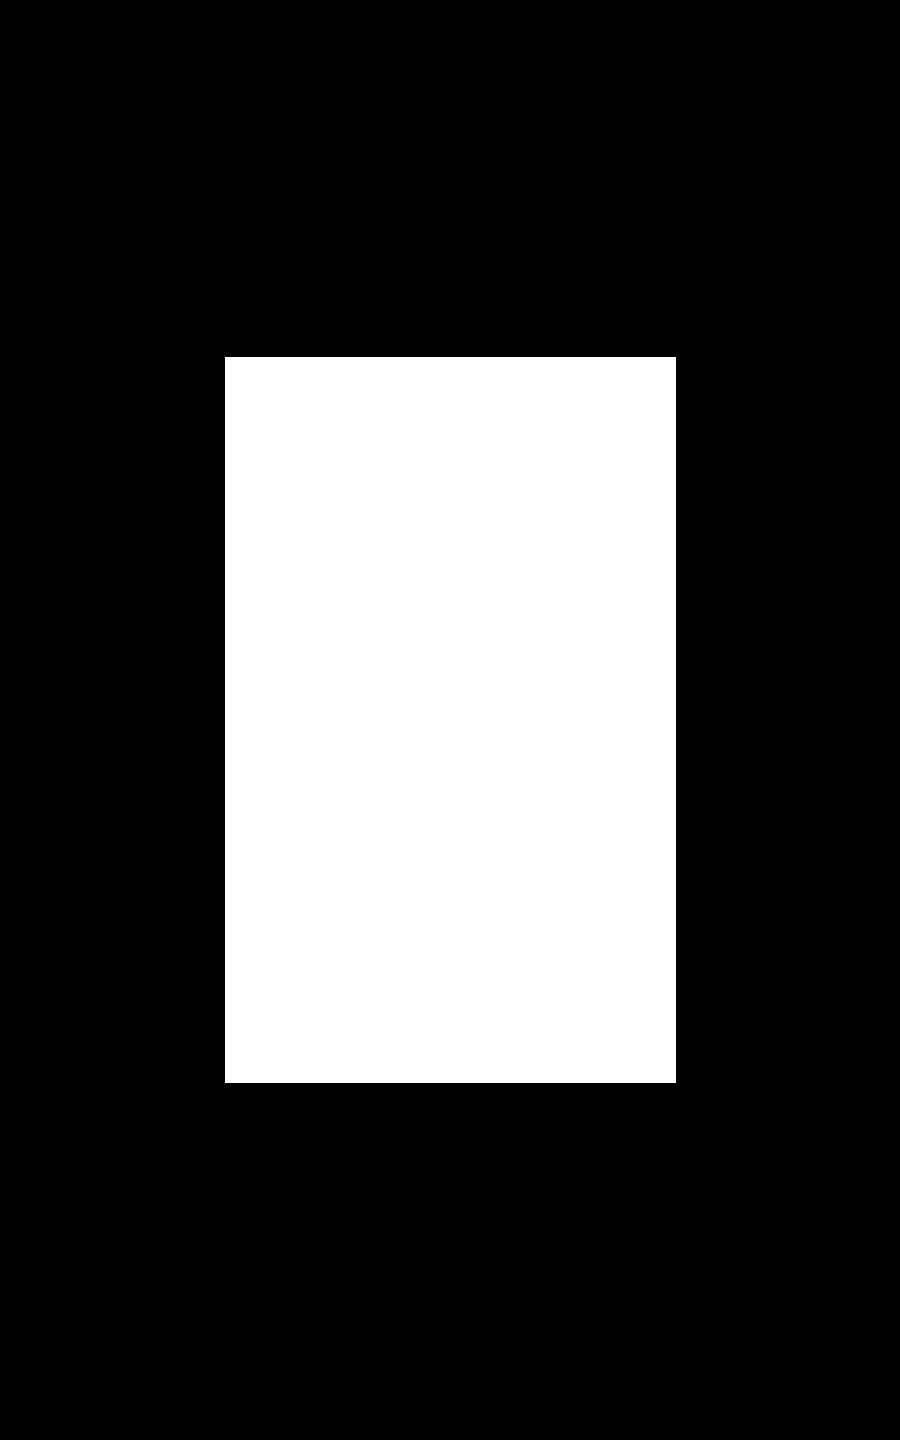

In [66]:
mask

In [67]:
import numpy as np
p_mask = np.array(mask)
p_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [60]:
with open('ebert_reviews/7-all-about-eve.txt') as file:
    text = file.read()

In [68]:
wordcloud = WordCloud(background_color='white', max_words=1000, mask=p_mask, contour_width=3,contour_color='firebrick')

wordcloud.generate(text)

In [69]:
wordcloud.to_file('all_about_eve.png')

In [70]:
im3 = Image.open('all_about_eve.png')

In [71]:
im3.paste(im2,offset)

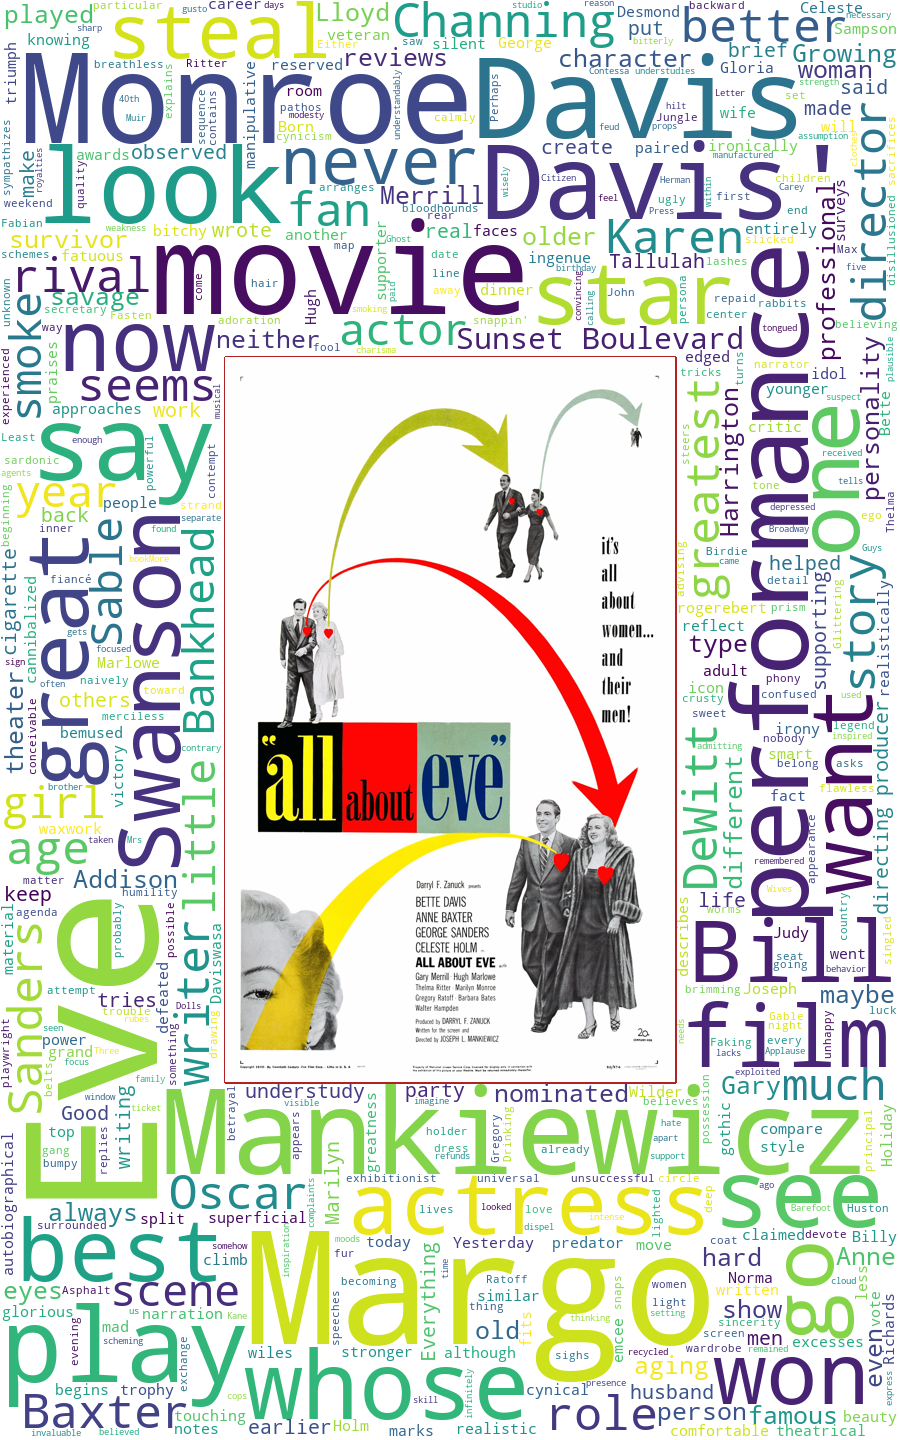

In [72]:
im3

In [73]:
im3.save('All_about_eve_wordcloud.png')